#Understand the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("CropData.csv")

In [3]:
df.head()

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,rice
1,21.770462,80.319644,7.038096,226.655537,rainy,rice
2,23.004459,82.320763,7.840207,263.964248,rainy,rice
3,26.491096,80.158363,6.980401,242.864034,rainy,rice
4,20.130175,81.604873,7.628473,262.717340,rainy,rice


In [4]:
df.tail()

,temperature,humidity,ph,water availability,season,label
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute
1399,26.574217,73.819949,7.261581,159.322307,rainy,jute


In [5]:
df.describe()

,temperature,humidity,ph,water availability
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651
std,4.081622,22.753785,0.835101,58.682258
min,15.330426,14.258040,3.504752,20.211267
25%,22.178239,56.824217,6.068795,51.546542
50%,25.140245,68.288321,6.524478,72.379183
75%,27.963227,82.710409,7.042343,107.428334
max,36.977944,94.962187,9.935091,298.560117


In [6]:
df.info

<bound method DataFrame.info of       temperature   humidity        ph  water availability season label
0       20.879744  82.002744  6.502985          202.935536  rainy  rice
1       21.770462  80.319644  7.038096          226.655537  rainy  rice
2       23.004459  82.320763  7.840207          263.964248  rainy  rice
3       26.491096  80.158363  6.980401          242.864034  rainy  rice
4       20.130175  81.604873  7.628473          262.717340  rainy  rice
...           ...        ...       ...                 ...    ...   ...
1395    23.874845  86.792613  6.718725          177.514731  rainy  jute
1396    23.928879  88.071123  6.880205          154.660874  rainy  jute
1397    24.814412  81.686889  6.861069          190.788639  rainy  jute
1398    24.447439  82.286484  6.769346          190.968489  rainy  jute
1399    26.574217  73.819949  7.261581          159.322307  rainy  jute

[1400 rows x 6 columns]>

In [7]:
df.isnull().sum()

temperature           0
humidity              0
ph                    0
water availability    0
season                0
label                 0
dtype: int64

#lets understand the relation, distribution and balance (EDA)


In [8]:
print(df["label"].value_counts())

label
maize          200
rice           100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
watermelon     100
muskmelon      100
cotton         100
jute           100
Name: count, dtype: int64


In [9]:
print(df['season'].unique())

['rainy' 'winter' 'spring' 'summer']


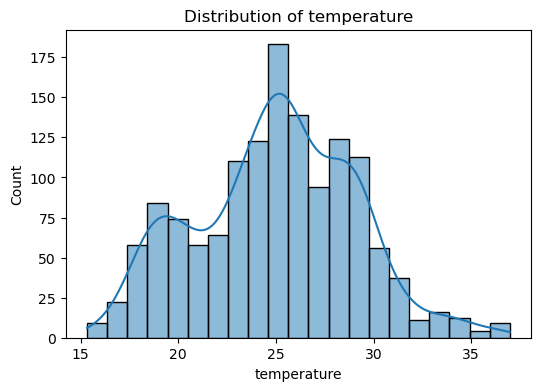

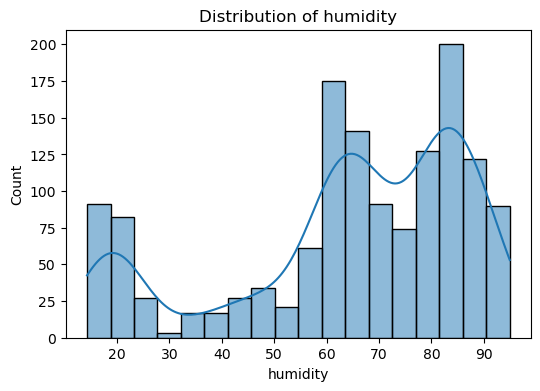

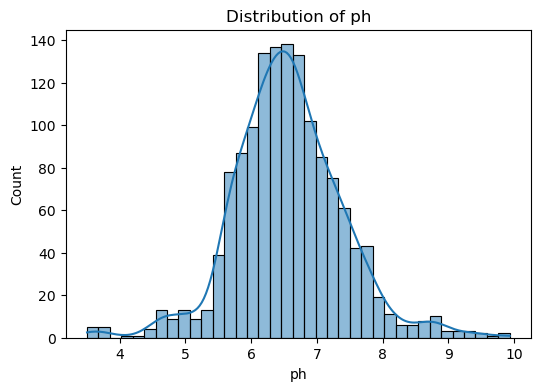

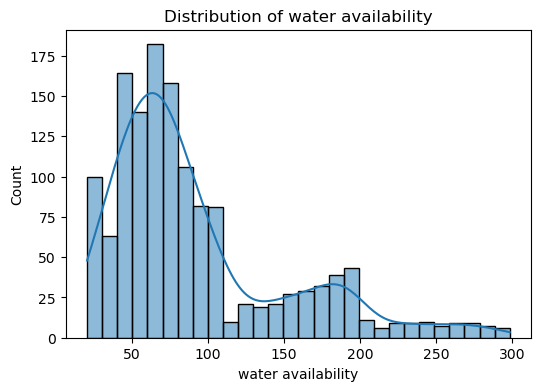

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['temperature', 'humidity', 'ph', 'water availability']
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

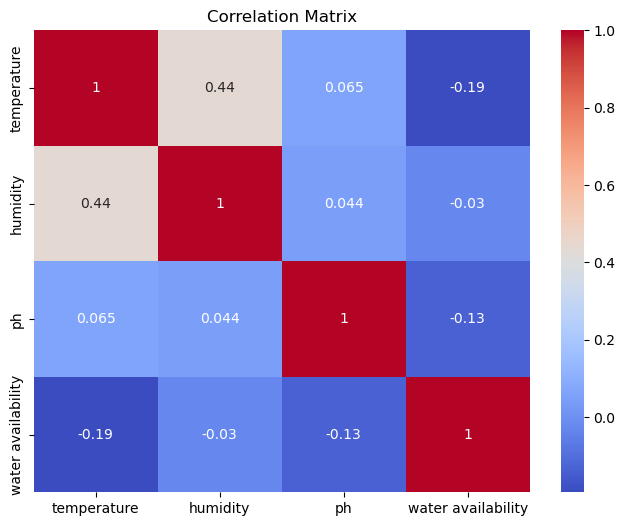

In [11]:
plt.figure(figsize=(8,6))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
print(df[['label','label_encoded']].head())

  label  label_encoded
0  rice             11
1  rice             11
2  rice             11
3  rice             11
4  rice             11


In [13]:
print(df[['label','label_encoded']].tail())

     label  label_encoded
1395  jute              3
1396  jute              3
1397  jute              3
1398  jute              3
1399  jute              3


In [14]:
#split the features and label
x = df[features]
y = df['label_encoded']

In [15]:
x.head(1)

,temperature,humidity,ph,water availability
0,20.879744,82.002744,6.502985,202.935536


In [16]:
y.head(1)

0    11
Name: label_encoded, dtype: int32

In [17]:
#train and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
X_train.head(1)

,temperature,humidity,ph,water availability
1175,27.996117,90.846603,6.630301,21.618938


In [19]:
Y_train.head(1)

1175    9
Name: label_encoded, dtype: int32

In [20]:
#Train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [22]:
Y_pred = rfc.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.9857142857142858


In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.95      0.95      0.95        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.98      1.00      0.99        40
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      0.95      0.95        20
          12       0.95      1.00      0.98        20

    accuracy                           0.99       280
   macro avg       0.99      0.98      0.99       280
weighted avg       0.99      0.99      0.99       280



#Let's give the input and check the model

In [25]:
new_input = {
    'temperature': [20],
    'humidity': [61],
    'ph': [6],
    'water availability': [61]
}

new_df = pd.DataFrame(new_input)

In [26]:
pred_encoded = rfc.predict(new_df)
pred_crop = label_encoder.inverse_transform(pred_encoded)
print("Predicted Crop:", pred_crop[0])

Predicted Crop: maize


#Let's save this model using JOBLIB

In [27]:
from joblib import dump, load

dump(rfc, 'Crop_prediction_model.joblib')
dump(label_encoder, 'Crop_label_encoder.joblib')

print("Model and Label encoder saved successfully with joblib!")


Model and Label encoder saved successfully with joblib!


In [28]:
from joblib import load

# Load the model
loaded_model = load('Crop_prediction_model.joblib')

# Use it to predict
prediction = loaded_model.predict([[30, 29, 3, 20 ]])  # Example input
print("Predicted crop:", prediction)


Predicted crop: [7]


c:\Users\UmmeHabeeba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
predicted_crop = label_encoder.inverse_transform(prediction)

In [30]:
print(predicted_crop)

['mothbeans']
